# Data Analysis

We have six datasets: 
1. Participant data
2. Participant task interaction data
3. Personality test of participants
4. Tasks
5. Post Study questionnaire data
6. Messages data

In [49]:
# Imports
import pandas as pd

## Pulling the data from Supabase

In [50]:
import csv
import requests

SUPABASE_URL = "https://vhuxlodxugpwodorwwzq.supabase.co"
SUPABASE_KEY = "sb_secret_iRWiJzUEwwbHNFA3A5LIUg_w_b9pmrh"

def export_table_to_csv(table_name: str, filename):
    """
    Export any Supabase table to a CSV file.
    
    Args:
        table_name (str): Name of the table to export.
        filename (str): Output CSV filename (defaults to <table_name>.csv).
    """
    if filename is None:
        filename = f"{table_name}.csv"

    url = f"{SUPABASE_URL}/rest/v1/{table_name}"
    headers = {
        "apikey": SUPABASE_KEY,
        "Authorization": f"Bearer {SUPABASE_KEY}",
        "Accept": "application/json"
    }

    # Fetch all rows
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Error fetching {table_name}: {response.status_code} {response.text}")
    
    rows = response.json()
    if not rows:
        print(f"No data found in {table_name}.")
        return

    # Write to CSV
    keys = rows[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(rows)

    print(f"Exported {len(rows)} rows from '{table_name}' to {filename}")

# Example usage
export_table_to_csv("participant", 'participant.csv')      # saves to participant.csv
export_table_to_csv("task", "tasks.csv") # saves to tasks.csv
export_table_to_csv("participant_task_interaction", "participant_task_interaction.csv")
export_table_to_csv("message", "message.csv")
export_table_to_csv("personality_test", "personality_test.csv")
export_table_to_csv("post_study_questions", "post_study_questions.csv")

Exported 62 rows from 'participant' to participant.csv
Exported 11 rows from 'task' to tasks.csv
Exported 484 rows from 'participant_task_interaction' to participant_task_interaction.csv
Exported 968 rows from 'message' to message.csv
Exported 67 rows from 'personality_test' to personality_test.csv
Exported 26 rows from 'post_study_questions' to post_study_questions.csv


## Participants Data Cleaning

In [51]:
participant = pd.read_csv('participant.csv')
participant = participant.drop(columns=['password'], axis=1)
participant.head()


,id,created_at,name,email,age,gender,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity
0,1,2025-08-11T16:39:58.335908+00:00,Shajia Mithani,shajia.mithani@gmail.com,28,female,university,social,pakistan,multiple-times,fluent-c1,"[{'label': 'Teaching', 'value': 'teaching'}]",True,"{'1': True, '2': True, '3': True, '4': False, ..."
1,2,2025-08-11T16:54:37.71803+00:00,Tauqeer Ahmed Iqbal Ahmed Shaikh,tauqeer.shaikh@stud.fra-uas.de,24,male,university,computing,india,constantly,fluent-c1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,"{'1': True, '2': True, '3': True, '4': True, '..."
2,3,2025-08-11T17:10:42.112849+00:00,Hamza Asaad,hamza.asaad@stud.fra-uas.de,26,male,university,computing,pakistan,always,fluent-c1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,"{'1': True, '2': False, '3': False, '4': False..."
3,4,2025-08-11T17:26:05.462118+00:00,rafia Basheer,rafia.ahamed-basheer@stud.fra-uas.de,33,female,university,engineering,india,often,intermediate-b2,"[{'label': 'Learning / Studying', 'value': 'le...",True,"{'1': True, '2': True, '3': True, '4': True, '..."
4,5,2025-08-11T18:52:21.661286+00:00,Adesh Shirke,adesh.shirke@stud.fra-uas.de,27,male,post-secondary,engineering,india,always,fluent-c1,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': False, '3': False, '4': False..."


In [58]:
print("total females:", participant.loc[participant['gender'] == 'female'].reset_index(drop=True).__len__())
print("total males:", participant.loc[participant['gender'] == 'male'].reset_index(drop=True).__len__())
print('Both includes duplicates')

total females: 14
total males: 48
Both includes duplicates


### Handling deduplication

In [ ]:
participant['email'] = participant['email'].str.lower().str.strip()
participant['name'] = participant['name'].str.lower().str.strip()

print(participant["name"].value_counts()[participant["name"].value_counts() > 1].__len__())
print(participant["email"].value_counts()[participant["email"].value_counts() > 1].__len__())

11
12


As some participants attempted the study more than once, we will still consider their prompts so we will merge them after we have imported and cleaned all the other datasets.

## Participant Task Interaction

In [65]:
participant_task_interaction = pd.read_csv('participant_task_interaction.csv')
participant_task_interaction.head()


,id,started_at,ended_at,ai_tool,participant_id,task_id
0,1,2025-08-11T16:43:46.321746+00:00,2025-08-11T16:43:46.588334+00:00,GPT-4o,1,1
1,2,2025-08-11T16:47:04.536261+00:00,NaN,GPT-4o,1,2
2,4,2025-08-11T16:48:39.841189+00:00,NaN,GPT-4o,1,3
3,5,2025-08-11T16:49:07.215491+00:00,NaN,GPT-4o,1,3
4,3,2025-08-11T16:48:15.553518+00:00,2025-08-11T16:49:21.11072+00:00,GPT-4o,1,3


## Messages

In [67]:
message = pd.read_csv('message.csv')
message.tail()

,id,created_at,interaction_id,sender,content
963,964,2025-08-19T20:48:47.893+00:00,482,ai,Sure! Here’s a fun and engaging dating profile...
964,965,2025-08-19T20:50:23.157+00:00,483,user,my friend is going through a break of 5 yr rel...
965,966,2025-08-19T20:50:34.907+00:00,483,ai,Supporting a friend through a breakup can be c...
966,967,2025-08-19T20:51:09.751+00:00,484,user,feels like he still in memories or moments wit...
967,968,2025-08-19T20:51:18.411+00:00,484,ai,It's completely normal for someone to feel stu...


In [68]:
task = pd.read_csv('tasks.csv')
task.head()

,id,description,task_type,category,title
0,1,Describe one of your favorite moments from you...,image,Image Generation,Visualize a memory from your last vacation.
1,2,You recently moved into a new room and are see...,image,Image Generation,Design your room
2,3,Start by telling the AI about your roommates (...,text,Brainstorming,You share an apartment and want help dividing ...
3,4,"Describe your friend to the AI — personality, ...",text,Brainstorming,Buy a thoughtful birthday gift for your best f...
4,5,"Share your fitness goals, dietary preferences,...",text,Planning,Build a weekly fitness and meal plan tailored ...


## Handling Duplication

Merging across the datasets.

In [69]:
import numpy as np

# Step 1: normalize email
participant["email_norm"] = participant["email"].str.strip().str.lower()

# Step 2: build dedupe key
participant["dedupe_key"] = np.where(
    participant["email_norm"].notna(),
    participant["email_norm"],
    participant["name"].str.strip().str.lower() + "_" +
    participant["age"].astype(str) + "_" +
    participant["nationality"].str.strip().str.lower()
)

# Step 3: sort and pick a canonical row for each dedupe_key
participants_sorted = participant.sort_values("created_at")
canonical = participants_sorted.drop_duplicates(subset=["dedupe_key"], keep="first")

# Step 4: map ALL old_ids to the canonical_id
id_map = {}
for key, group in participants_sorted.groupby("dedupe_key"):
    canonical_id = group.iloc[0]["id"]   # pick the first submission
    for pid in group["id"]:
        id_map[pid] = canonical_id

# Step 5: reassign interactions to canonical participant_id
participant_task_interaction["participant_id"] = participant_task_interaction["participant_id"].map(id_map)

# Step 6: now canonical is your deduplicated participant table
deduped = canonical.copy()

# Step 7: balance genders
male_df = deduped[deduped["gender"].str.lower() == "male"]
female_df = deduped[deduped["gender"].str.lower() == "female"]

n_females = len(female_df)
balanced_male_df = male_df.sample(n=n_females, random_state=42)

final_participants = pd.concat([balanced_male_df, female_df], ignore_index=True)
final_participants = final_participants.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_participants["gender"].value_counts())


gender
male      10
female    10
Name: count, dtype: int64


In [78]:
final_participants.__len__()



20

# Analysis

Data restructuring

In [79]:
# Merge PTI with message
merged_df = participant_task_interaction.merge(
    message,
    left_on="id",          
    right_on="interaction_id",  
    how="inner"
)

# Merge with task
merged_df = merged_df.merge(
    task,
    left_on="task_id",
    right_on="id",
    how="inner",
    suffixes=("", "_task")
)

# Merge with participant (to bring gender + any other attributes)
merged_df = merged_df.merge(
    final_participants,
    left_on="participant_id",
    right_on="id",
    how="inner",
    suffixes=("", "_participant")
)

# Sort for chronological conversations
merged_df = merged_df.sort_values(by=["participant_id", "task_id", "created_at"])

# Group conversations per participant/task, but now gender is also available
grouped_conversations = (
    merged_df.groupby(["participant_id", "gender", "task_id"])
    .apply(lambda x: [
        {"sender": row["sender"], "content": row["content"], "created_at": row["created_at"]}
        for _, row in x.iterrows()
    ])
    .reset_index(name="conversation")
)

# grouped_conversations.to_csv('./data/grouped_conversations.csv', index=False)



C:\Users\Aliza\AppData\Local\Temp\ipykernel_22836\1365536167.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [


### N by gender

In [ ]:
merged_df.groupby('gender').count()['content']

gender
female    100
male      296
Name: content, dtype: int64

# Dependent Variables

## Prompt Length

In [10]:
def prompt_length(conv):
    return [len(msg["content"].split()) for msg in conv if msg["sender"] == "user"][0]


In [11]:
grouped_conversations["prompt_length"] = grouped_conversations["conversation"].apply(prompt_length)
prompt_lengths = grouped_conversations[['gender', 'prompt_length']]

In [12]:
prompt_lengths.head()

,gender,prompt_length
0,female,21
1,female,35
2,female,9
3,female,15
4,female,7


In [13]:
prompt_lengths.groupby('gender').mean()

,prompt_length
gender,
female,43.433333
male,32.009217


## Vocabular Variety (TTR)

In [14]:
def ttr(conv):
    '''Distinct Words Ratio'''
    texts = [msg["content"] for msg in conv if msg["sender"] == "user"]
    words = " ".join(texts).split()
    return len(set(words)) / len(words) if words else 0


In [15]:
grouped_conversations["ttr"] = grouped_conversations["conversation"].apply(ttr)
ttr = grouped_conversations[['gender', 'ttr']]

In [16]:
ttr.head()

,gender,ttr
0,female,0.904762
1,female,0.914286
2,female,0.833333
3,female,1.000000
4,female,0.935484


In [17]:
ttr.groupby('gender').mean()

,ttr
gender,
female,0.785777
male,0.853353


## Emotion and Judgement Words

In [18]:

# Load NRC Emotion Lexicon
lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                      names=["word", "emotion", "association"], 
                      sep="\t")

# Keep only associations where association == 1
lexicon = lexicon[lexicon["association"] == 1]

# Convert to dictionary: {word: [emotions]}
emotion_words = {}
for _, row in lexicon.iterrows():
    emotion_words.setdefault(row["word"], []).append(row["emotion"])

print(emotion_words)

def emotion_counts(conv):
    counts = {
        "anger": 0, "anticipation": 0, "disgust": 0, "fear": 0,
        "joy": 0, "negative": 0, "positive": 0, "sadness": 0,
        "surprise": 0, "trust": 0
    }
    for msg in conv:
        if msg["sender"] == "user":   # or "participant" depending on your mapping
            for w in msg["content"].lower().split():
                if w in emotion_words:
                    for emo in emotion_words[w]:
                        counts[emo] += 1
    return counts



{'abacus': ['trust'], 'abandon': ['fear', 'negative', 'sadness'], 'abandoned': ['anger', 'fear', 'negative', 'sadness'], 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'], 'abba': ['positive'], 'abbot': ['trust'], 'abduction': ['fear', 'negative', 'sadness', 'surprise'], 'aberrant': ['negative'], 'aberration': ['disgust', 'negative'], 'abhor': ['anger', 'disgust', 'fear', 'negative'], 'abhorrent': ['anger', 'disgust', 'fear', 'negative'], 'ability': ['positive'], 'abject': ['disgust', 'negative'], 'abnormal': ['disgust', 'negative'], 'abolish': ['anger', 'negative'], 'abolition': ['negative'], 'abominable': ['disgust', 'fear', 'negative'], 'abomination': ['anger', 'disgust', 'fear', 'negative'], 'abort': ['negative'], 'abortion': ['disgust', 'fear', 'negative', 'sadness'], 'abortive': ['negative', 'sadness'], 'abovementioned': ['positive'], 'abrasion': ['negative'], 'abrogate': ['negative'], 'abrupt': ['surprise'], 'abscess': ['negative', 'sadness'], 'absence': ['fear

In [19]:
grouped_conversations["emotion_counts"] = grouped_conversations["conversation"].apply(emotion_counts)
emotion_counts = grouped_conversations[['gender', 'emotion_counts']]

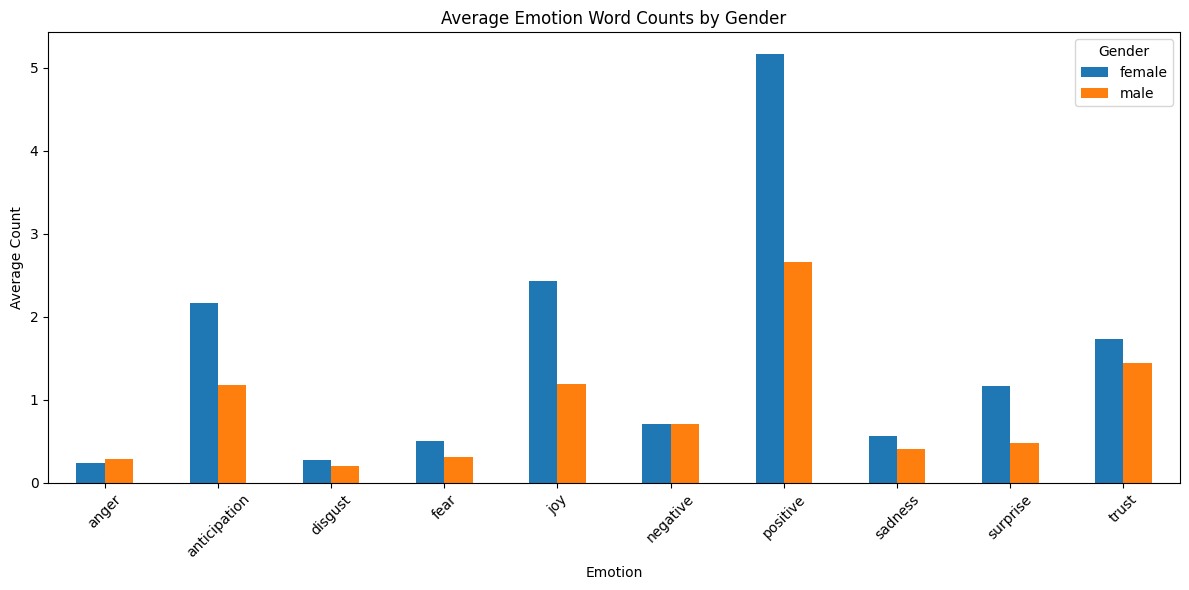

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

emotions_df = pd.json_normalize(emotion_counts['emotion_counts'])

# Merge with gender
df_expanded = pd.concat([emotion_counts['gender'], emotions_df], axis=1)

# Compute mean emotion counts by gender
mean_emotions = df_expanded.groupby("gender").mean()

# Plot
mean_emotions.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Emotion Word Counts by Gender")
plt.ylabel("Average Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

## Pronoun Usage

In [21]:
pronouns = {
    "first": {"i","me","my","we","us","our"},
    "second": {"you","your","yours"},
    "third": {"he","she","they","it","them","his","her","their"}
}

def pronoun_usage(conv):
    counts = {"first": 0, "second": 0, "third": 0}
    total = 0
    for msg in conv:
        if msg["sender"] == "user":
            words = msg["content"].lower().split()
            total += len(words)
            for w in words:
                for p in pronouns:
                    if w in pronouns[p]:
                        counts[p] += 1
    return {k: v/total if total else 0 for k,v in counts.items()}


In [22]:
grouped_conversations["pronoun_usage"] = grouped_conversations["conversation"].apply(pronoun_usage)
pronoun_usage = grouped_conversations[['gender', 'pronoun_usage']]

In [23]:
pronoun_usage.head()

,gender,pronoun_usage
0,female,"{'first': 0.0, 'second': 0.0, 'third': 0.04761..."
1,female,"{'first': 0.0, 'second': 0.0, 'third': 0.0}"
2,female,"{'first': 0.16666666666666666, 'second': 0.0, ..."
3,female,"{'first': 0.13333333333333333, 'second': 0.0, ..."
4,female,"{'first': 0.0967741935483871, 'second': 0.0, '..."


In [43]:
# expand the dicts in pronoun_usage into columns
expanded = pd.json_normalize(pronoun_usage['pronoun_usage'])

# join gender with expanded values
df_expanded = pd.concat([pronoun_usage['gender'], expanded], axis=1)

df_expanded.groupby('gender')[['first', 'second', 'third']].mean()

,first,second,third
gender,,,
female,0.070299,0.004273,0.023178
male,0.057844,0.008656,0.015173


## Sentence Length

In [24]:
import nltk
# Only need to do this once; run separately, not inside main loop
nltk.download("punkt")
nltk.download("punkt_tab")  # sometimes required in new nltk versions

def avg_sentence_length(conv):
    lengths = []
    for msg in conv:
        if msg["sender"] == "user":
            sentences = nltk.sent_tokenize(msg["content"])
            for s in sentences:
                lengths.append(len(s.split()))
    return sum(lengths)/len(lengths) if lengths else 0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aliza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aliza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [25]:
grouped_conversations["sentence_length"] = grouped_conversations["conversation"].apply(avg_sentence_length)
sentence_length = grouped_conversations[['gender', 'sentence_length']]

In [26]:
sentence_length.head()

,gender,sentence_length
0,female,21.000000
1,female,7.000000
2,female,8.000000
3,female,7.500000
4,female,4.428571


In [27]:
sentence_length.groupby("gender").mean().reset_index()

,gender,sentence_length
0,female,10.944815
1,male,15.778090


## Sentence Count

In [28]:
def sentence_count(conv):
    return sum(len(nltk.sent_tokenize(msg["content"])) for msg in conv if msg["sender"]=="user")


In [29]:
grouped_conversations["sentence_count"] = grouped_conversations["conversation"].apply(sentence_count)
sentence_counts = grouped_conversations[['gender', 'sentence_count']]
sentence_counts.head()

,gender,sentence_count
0,female,1
1,female,5
2,female,3
3,female,2
4,female,7


In [30]:
sentence_counts.groupby("gender").mean().reset_index()

,gender,sentence_count
0,female,5.666667
1,male,3.276498


## Phatic Expressions

In [31]:
phatic = {"hi","hello","thanks","thank you","bye"}

def contains_phatic(conv):
    return any(any(word in msg["content"].lower() for word in phatic) 
               for msg in conv if msg["sender"]=="user")


In [32]:
grouped_conversations["phatic_expressions"] = grouped_conversations["conversation"].apply(contains_phatic)
phatic_expressions = grouped_conversations[['gender', 'phatic_expressions']]
phatic_expressions.head()

,gender,phatic_expressions
0,female,True
1,female,True
2,female,True
3,female,False
4,female,True


In [33]:
phatic_expressions.groupby("gender").mean().reset_index()

,gender,phatic_expressions
0,female,0.566667
1,male,0.470046


## Opinions (Subjectivity)

In [34]:
from textblob import TextBlob

def opinion_score(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return TextBlob(texts).sentiment.subjectivity if texts else 0


In [35]:
grouped_conversations["opinion_score"] = grouped_conversations["conversation"].apply(opinion_score)
opinion_scores = grouped_conversations[['gender', 'opinion_score']]
opinion_scores.head()

,gender,opinion_score
0,female,0.390000
1,female,0.241667
2,female,0.687500
3,female,1.000000
4,female,0.525983


In [36]:
opinion_scores.groupby("gender").mean().reset_index()

,gender,opinion_score
0,female,0.448507
1,male,0.395812


## Sentiment Score

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return analyzer.polarity_scores(texts)["compound"] if texts else 0


In [38]:
grouped_conversations["sentiment"] = grouped_conversations["conversation"].apply(sentiment)
sentiment_scores = grouped_conversations[['gender', 'sentiment']]
sentiment_scores.head()

,gender,sentiment
0,female,-0.3384
1,female,0.3612
2,female,0.0772
3,female,0.8225
4,female,0.6397


In [39]:
sentiment_scores.groupby("gender").mean().reset_index()

,gender,sentiment
0,female,0.688317
1,male,0.456519


## Iteration Count

In [40]:
def iteration_count(conv):
    return sum(1 for msg in conv if msg["sender"]=="user")


In [41]:
grouped_conversations["iteration_count"] = grouped_conversations["conversation"].apply(iteration_count)
iteration_counts = grouped_conversations[['gender', 'iteration_count']]
iteration_counts.head() 

,gender,iteration_count
0,female,1
1,female,1
2,female,3
3,female,1
4,female,2


In [42]:
iteration_counts.groupby("gender").mean().reset_index()

,gender,iteration_count
0,female,1.666667
1,male,2.000000
